In [1]:
import pandas as pd
pd.set_option('display.max_column',999)
pd.set_option('display.max_row',999)

chemin = 'D:/Documents/OpenClassrooms/P7_delfosse_emilie/P7_prediction/data'

In [2]:
X_train_strat=pd.read_csv(chemin+'/prepared_data.csv',index_col=0)

y_train_strat=X_train_strat['TARGET']
X_train_strat.drop(columns=['TARGET'],inplace=True)

In [3]:
X_train_strat.shape

(30751, 788)

In [4]:
weight=(y_train_strat.value_counts()/y_train_strat.shape[0]).to_dict()

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clfs = {
#     'KNN':KNeighborsClassifier(),
#     'gb': GradientBoostingClassifier(random_state = 40),
#     'dt': DecisionTreeClassifier(random_state = 40),
#     'rf': RandomForestClassifier(random_state=40),
#     'mlp': MLPClassifier(random_state=40),
#     'ada': AdaBoostClassifier(random_state = 40),
#     'gnb':GaussianNB(),
    'xgboost' : XGBClassifier(random_state = 40,class_weight=weight),
    'lightgbm ' : LGBMClassifier(random_state = 40,class_weight=weight),
    'l2':LogisticRegression(random_state = 40,class_weight=weight),
    'l1':LogisticRegression(penalty='l1',solver='saga',random_state = 40,class_weight=weight)}

In [8]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold    
def test_model(rf,X_train,y_train):
    cv = StratifiedKFold(n_splits= 10, shuffle=True, random_state=45)
    p = cross_val_score(rf, X_train.values, y_train.values, cv=cv, scoring=make_scorer(precision_score,average='weighted'))           
    return p

In [8]:
p={}
for i in clfs:
    print(i)
    p[i] = test_model(clfs[i],X_train_strat,y_train_strat)
    print('___')
    
p=pd.DataFrame(p)
p

xgboost


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
___
lightgbm 
___
l2


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max

___
l1


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_

___


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,xgboost,lightgbm,l2,l1
0,0.854878,0.844509,0.844654,0.844654
1,0.845035,0.865569,0.845204,0.845204
2,0.863508,0.845107,0.845155,0.845204
3,0.858800,0.845010,0.845204,0.845204
4,0.855391,0.858800,0.845204,0.845204
5,0.845131,0.845131,0.845131,0.845204
6,0.845059,0.865772,0.845180,0.845204
7,0.865569,0.845083,0.845180,0.845204
8,0.865255,0.844509,0.844509,0.844606
9,0.852760,0.844509,0.844606,0.844606


In [9]:
mean_p=p.mean()
max_p=p.max()

result_p=pd.concat([mean_p,max_p],keys=['mean','max'],axis=1)
result_p['rank_mean']=result_p['mean'].rank(ascending=False)
result_p['rank_max']=result_p['max'].rank(ascending=False)

result_p['final_rank']=(result_p['rank_max']+result_p['rank_mean'])

result_p.sort_values(by='final_rank').head(1)

,mean,max,rank_mean,rank_max,final_rank
xgboost,0.855139,0.865569,1.0,2.0,3.0


Text(0.5, 1.0, 'Precision')

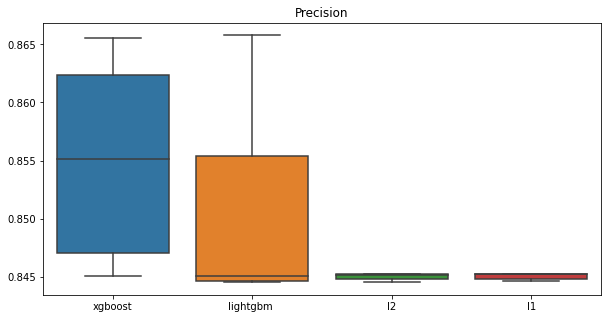

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 1,figsize=(10,5))

sns.boxplot(data=p,ax=axs)
axs.set_title('Precision')

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}


In [12]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import make_scorer

# clf = MLPClassifier(random_state=40)

# #creating Scoring parameter: 
# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# param_grid = {
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# #passing the scoring function in the GridSearchCV
# grid_search = GridSearchCV(estimator =clf, param_grid =param_grid, scoring=scoring, refit='precision', cv=5, n_jobs=-1)

# grid_search.fit(X_train_strat,y_train_strat)

# df=pd.DataFrame.from_dict(grid_search.cv_results_)

In [13]:
# grid_search.best_params_

In [14]:
# clf = RandomForestClassifier(random_state=40)
# param_grid = {
#  'max_depth': [10, 50, 100, None],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10]}

# #passing the scoring function in the GridSearchCV
# grid_search2 = GridSearchCV(estimator = clf, param_grid =param_grid, scoring=scoring, refit='precision', cv=5, n_jobs=-1)

# # X_train_strat_renamed = X_train_strat.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# grid_search2.fit(X_train_strat,y_train_strat)

# df2=pd.DataFrame.from_dict(grid_search2.cv_results_)


# grid_search2.best_params_

In [7]:
clf = XGBClassifier(random_state = 40)
param_grid ={
        'class_weight':[weight],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

#passing the scoring function in the GridSearchCV
grid_search4 = GridSearchCV(estimator = clf, param_grid =param_grid, scoring=scoring, refit='precision', cv=5, n_jobs=-1)

grid_search4.fit(X_train_strat,y_train_strat)

df4=pd.DataFrame.from_dict(grid_search4.cv_results_)

grid_search4.best_params_

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'class_weight': {0.0: 0.9192546583850931, 1.0: 0.08074534161490683},
 'max_depth': 4,
 'min_child_weight': 10,
 'subsample': 0.8}

In [8]:
weight

{0.0: 0.9192546583850931, 1.0: 0.08074534161490683}

In [8]:
import re

clf = LGBMClassifier(random_state = 40)

param_grid = {
    
    'class_weight':[weight],
    'n_estimators':[10,100,1000,10000],
    'learning_rate': [0.01,0.02,0.04,0.05],
    'num_leaves':[12,24,34,45,56]}

#passing the scoring function in the GridSearchCV
grid_search3 = GridSearchCV(estimator = clf, param_grid =param_grid, scoring=scoring, refit='precision', cv=5, n_jobs=-1)

X_train_strat_renamed = X_train_strat.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

grid_search3.fit(X_train_strat_renamed,y_train_strat)

df3=pd.DataFrame.from_dict(grid_search3.cv_results_)
grid_search3.best_params_

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
14 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py",

{'class_weight': {0.0: 0.9192546583850931, 1.0: 0.08074534161490683},
 'learning_rate': 0.05,
 'n_estimators': 10000,
 'num_leaves': 12}

In [11]:

best_clf_opt={'LGBM':LGBMClassifier(random_state = 40,class_weight=weight),
              'LGBM_opt':LGBMClassifier(random_state = 40,class_weight=weight,learning_rate=0.05,n_estimators= 10000,num_leaves= 12),
             'XGB' :XGBClassifier(random_state = 40,class_weight=weight),
              'XGB_opt' :XGBClassifier(random_state = 40,class_weight= weight, max_depth= 4, min_child_weight= 10,subsample= 0.8)}

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train_strat,y_train_strat, test_size=0.33, random_state=42)

X_train_train = X_train_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_train_test = X_train_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

y_pred={}
precision={}
for i in best_clf_opt:
    model=best_clf_opt[i]
    model.fit(X_train_train,y_train_train)
    y_pred[i]=model.predict(X_train_test)   
    precision[i]=precision_score(y_train_test, y_pred[i],average='weighted')

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[09:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
precision

{'LGBM': 0.8610682957681342,
 'LGBM_opt': 0.8438271364431232,
 'XGB': 0.855327438630491,
 'XGB_opt': 0.8654425844786479}

In [10]:
from sklearn.metrics import fbeta_score

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train_strat,y_train_strat, test_size=0.33, random_state=42,stratify=y_train_strat)

clf_opt = XGBClassifier(random_state = 40,class_weight= weight, max_depth= 4, min_child_weight= 10,subsample= 0.8)
clf_opt.fit(X_train_train,y_train_train)
prb=clf_opt.predict_proba(X_train_test)
prb=pd.DataFrame(prb)

seuil_precision={}
seuil_fbeta={}
for i in np.arange(0,1.01,0.01):
    prb_seuil_i=prb[1].copy()
    prb_seuil_i[prb_seuil_i>=i] = 1
    prb_seuil_i[prb_seuil_i<i] = 0
    seuil_precision[i]=precision_score(y_train_test, prb_seuil_i,average='weighted')
    seuil_fbeta[i]=fbeta_score(y_train_test,prb_seuil_i,average='weighted',beta=0.5)

[09:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\emili\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emili\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emili\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

C:\Users\emili\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import matplotlib.pyplot as plt

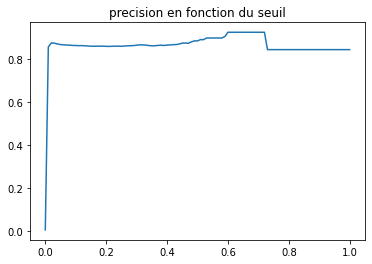

In [12]:
lists = sorted(seuil_precision.items()) 
x, y = zip(*lists) 
plt.plot(x, y)
plt.title('precision en fonction du seuil')
plt.show()

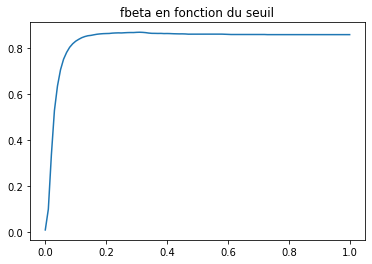

In [13]:
lists = sorted(seuil_fbeta.items()) 
x, y = zip(*lists) 
plt.plot(x, y)
plt.title('fbeta en fonction du seuil')
plt.show()

In [14]:
seuil_fbeta

{0.0: 0.007980711863207462,
 0.01: 0.09818033648065438,
 0.02: 0.33497264187279274,
 0.03: 0.5281660720985567,
 0.04: 0.6350487737052538,
 0.05: 0.7057426040172882,
 0.06: 0.7516698360093003,
 0.07: 0.7813903015529436,
 0.08: 0.803683784699034,
 0.09: 0.8190684285221077,
 0.1: 0.8304646331075367,
 0.11: 0.838636222831558,
 0.12: 0.8457022759096277,
 0.13: 0.8506241609894215,
 0.14: 0.8540827568291968,
 0.15: 0.8556827558764276,
 0.16: 0.8583215427288375,
 0.17: 0.8606816622371256,
 0.18: 0.862162477605602,
 0.19: 0.8631917210596659,
 0.2: 0.8636729183209719,
 0.21: 0.864036692025308,
 0.22: 0.8654627679416516,
 0.23: 0.8662076740546084,
 0.24: 0.866680086318267,
 0.25: 0.866299976862844,
 0.26: 0.867132224535781,
 0.27: 0.8678034733953094,
 0.28: 0.8681020625738445,
 0.29: 0.8680374902490388,
 0.3: 0.8689415260331557,
 0.31: 0.8693541715013169,
 0.32: 0.8687694659638935,
 0.33: 0.8676027541207647,
 0.34: 0.8657574044640896,
 0.35000000000000003: 0.8646043626149398,
 0.36: 0.86446468930

In [15]:
max(y)

0.8693541715013169

In [16]:
import pickle
with open('D:\Documents\OpenClassrooms\P7_delfosse_emilie\model_pkl2', 'wb') as files:
    pickle.dump(clf_opt, files)